In [ ]:
# Credit Card Fraud Detection

This project aims to detect credit card fraud using various machine learning models. We will enhance the basic approach by adding feature engineering, anomaly detection, and ensemble learning techniques, along with model explainability using SHAP.


In [40]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Ignore warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for consistency
%matplotlib inline
sns.set(style="whitegrid")


In [41]:
# Load the dataset
df = pd.read_csv('data/creditcard.csv')

# Display the first few rows of the dataset
df.head()

# Check for null values
print(df.isnull().sum())

# Display basic statistics of the dataset
df.describe()

# Get the datatype information of the dataset
df.info()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11  

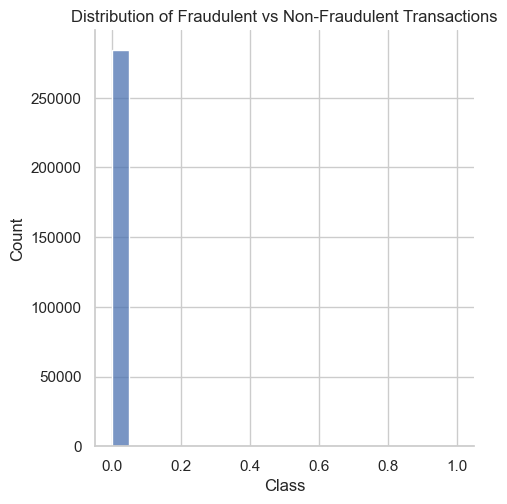

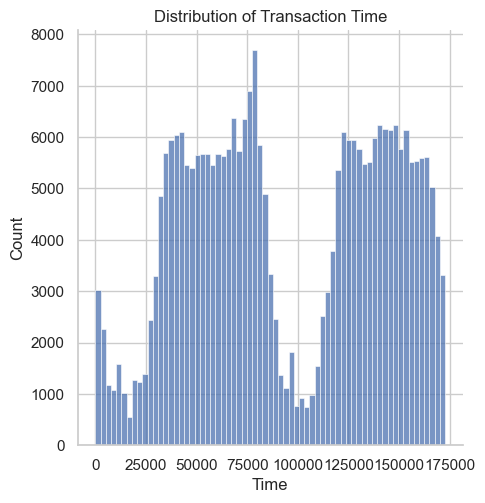

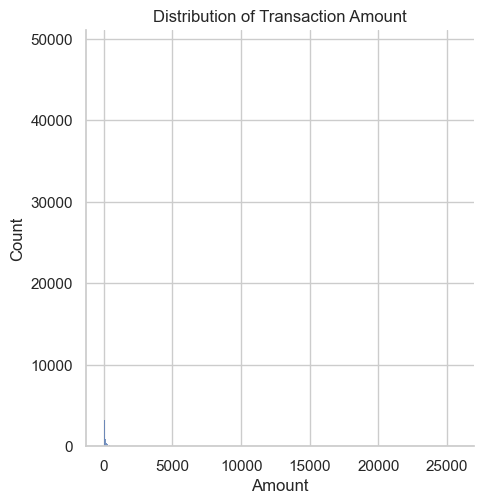

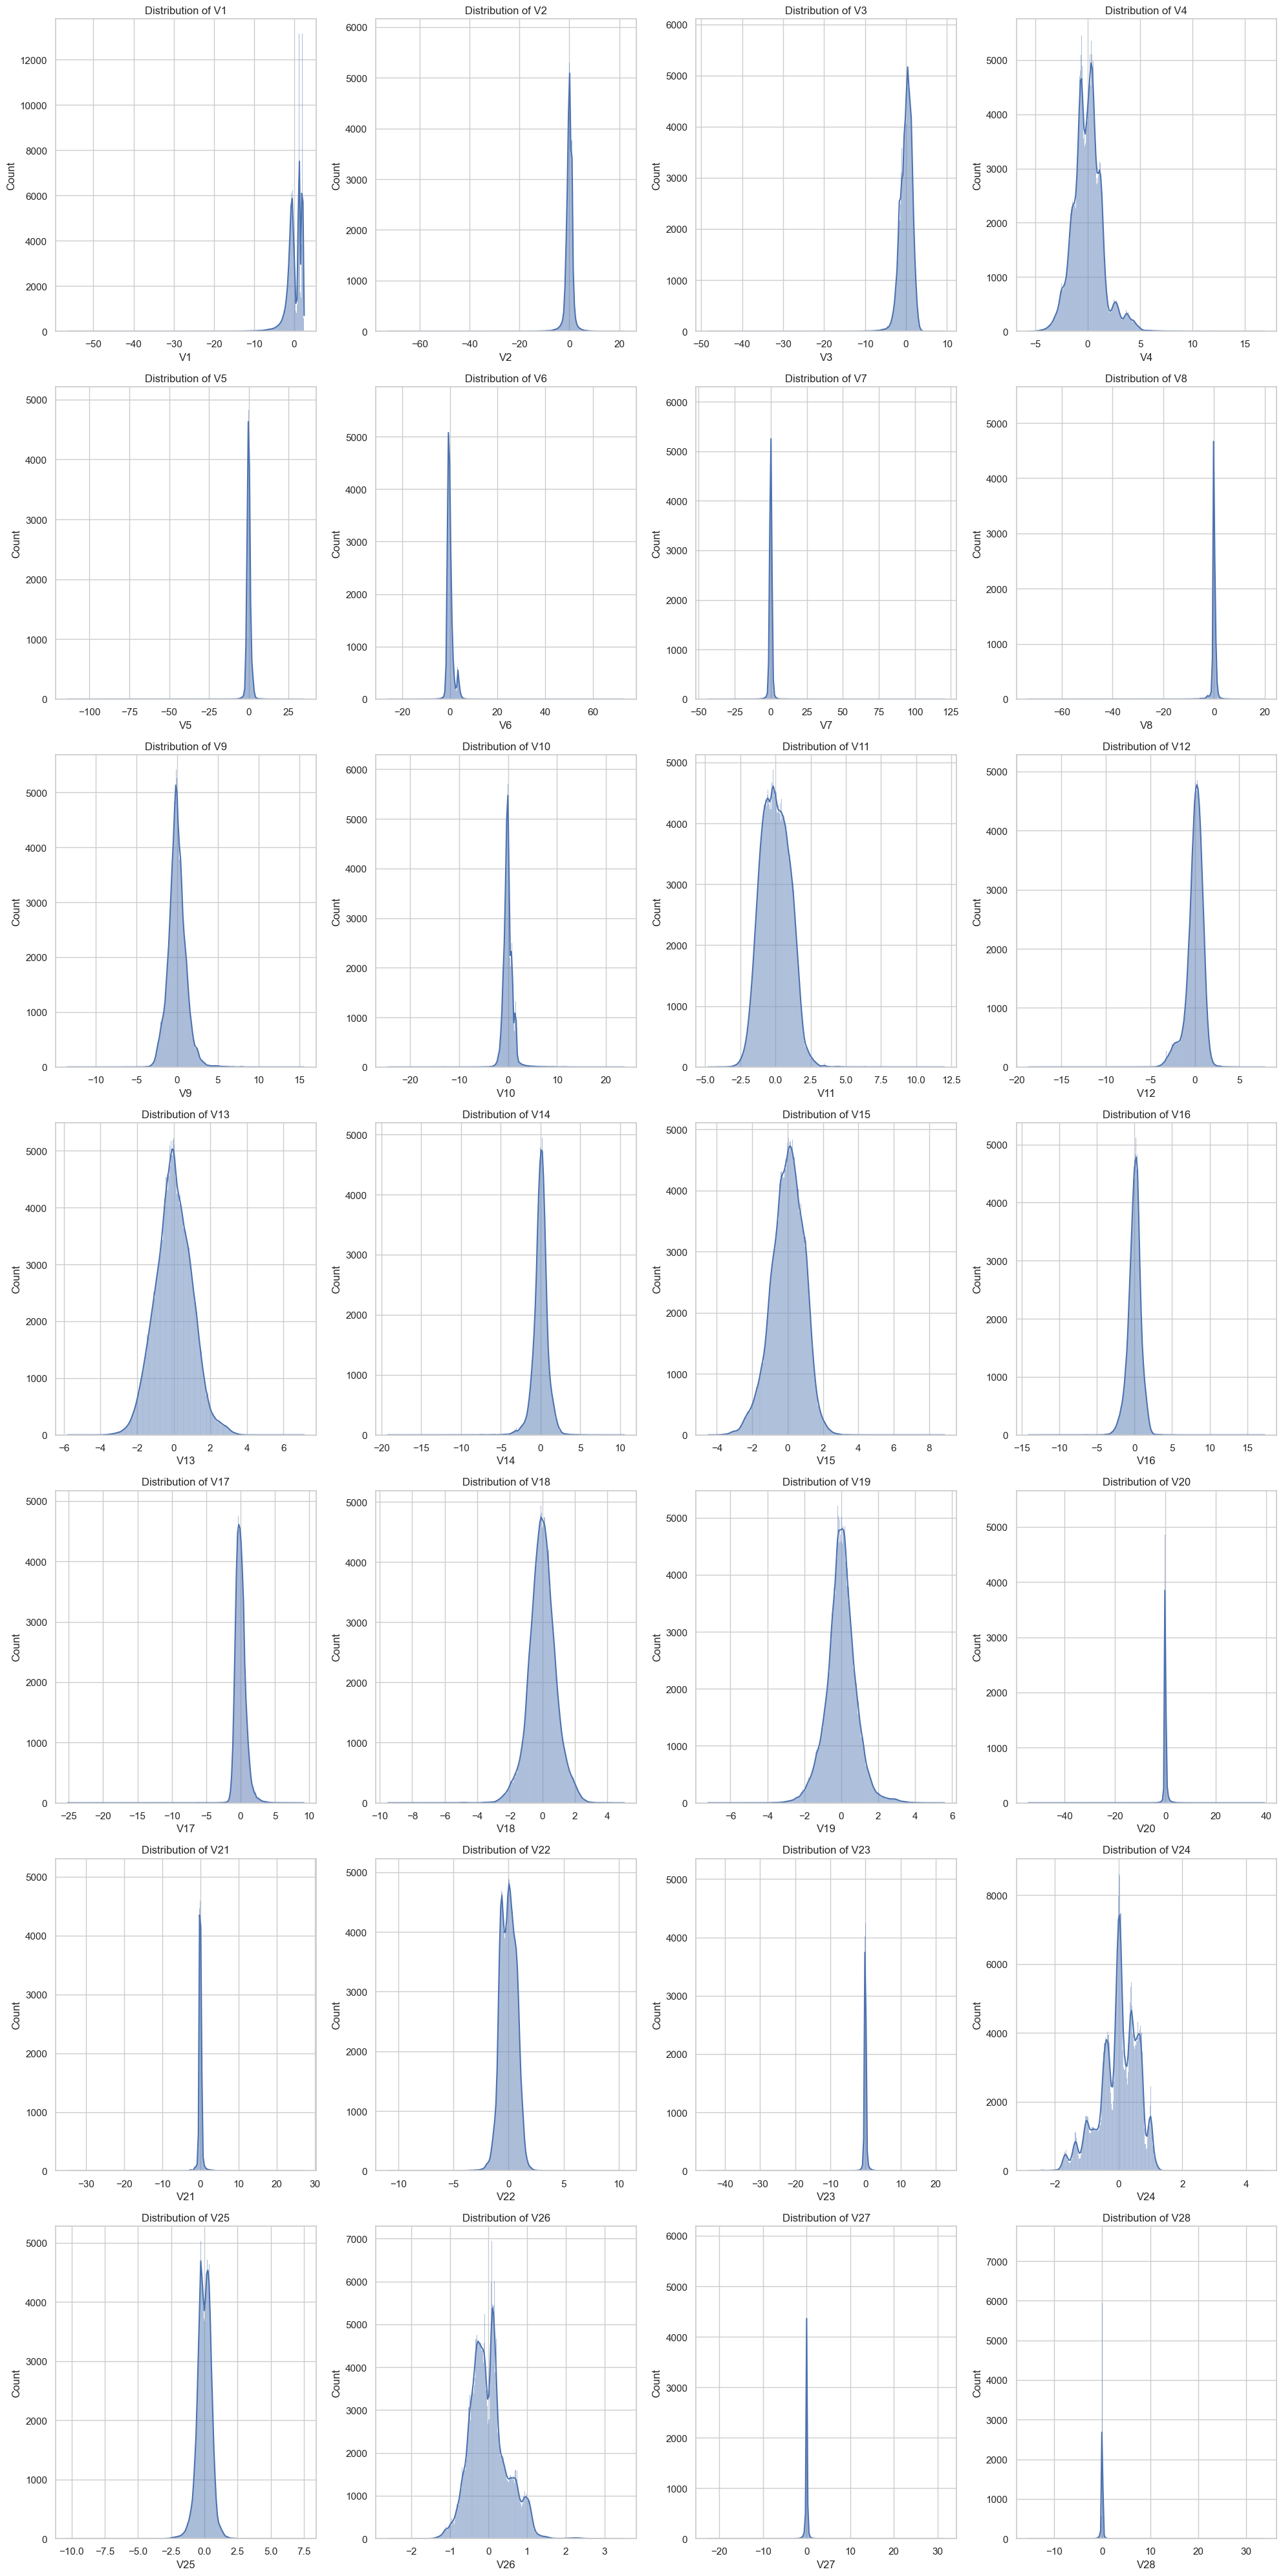

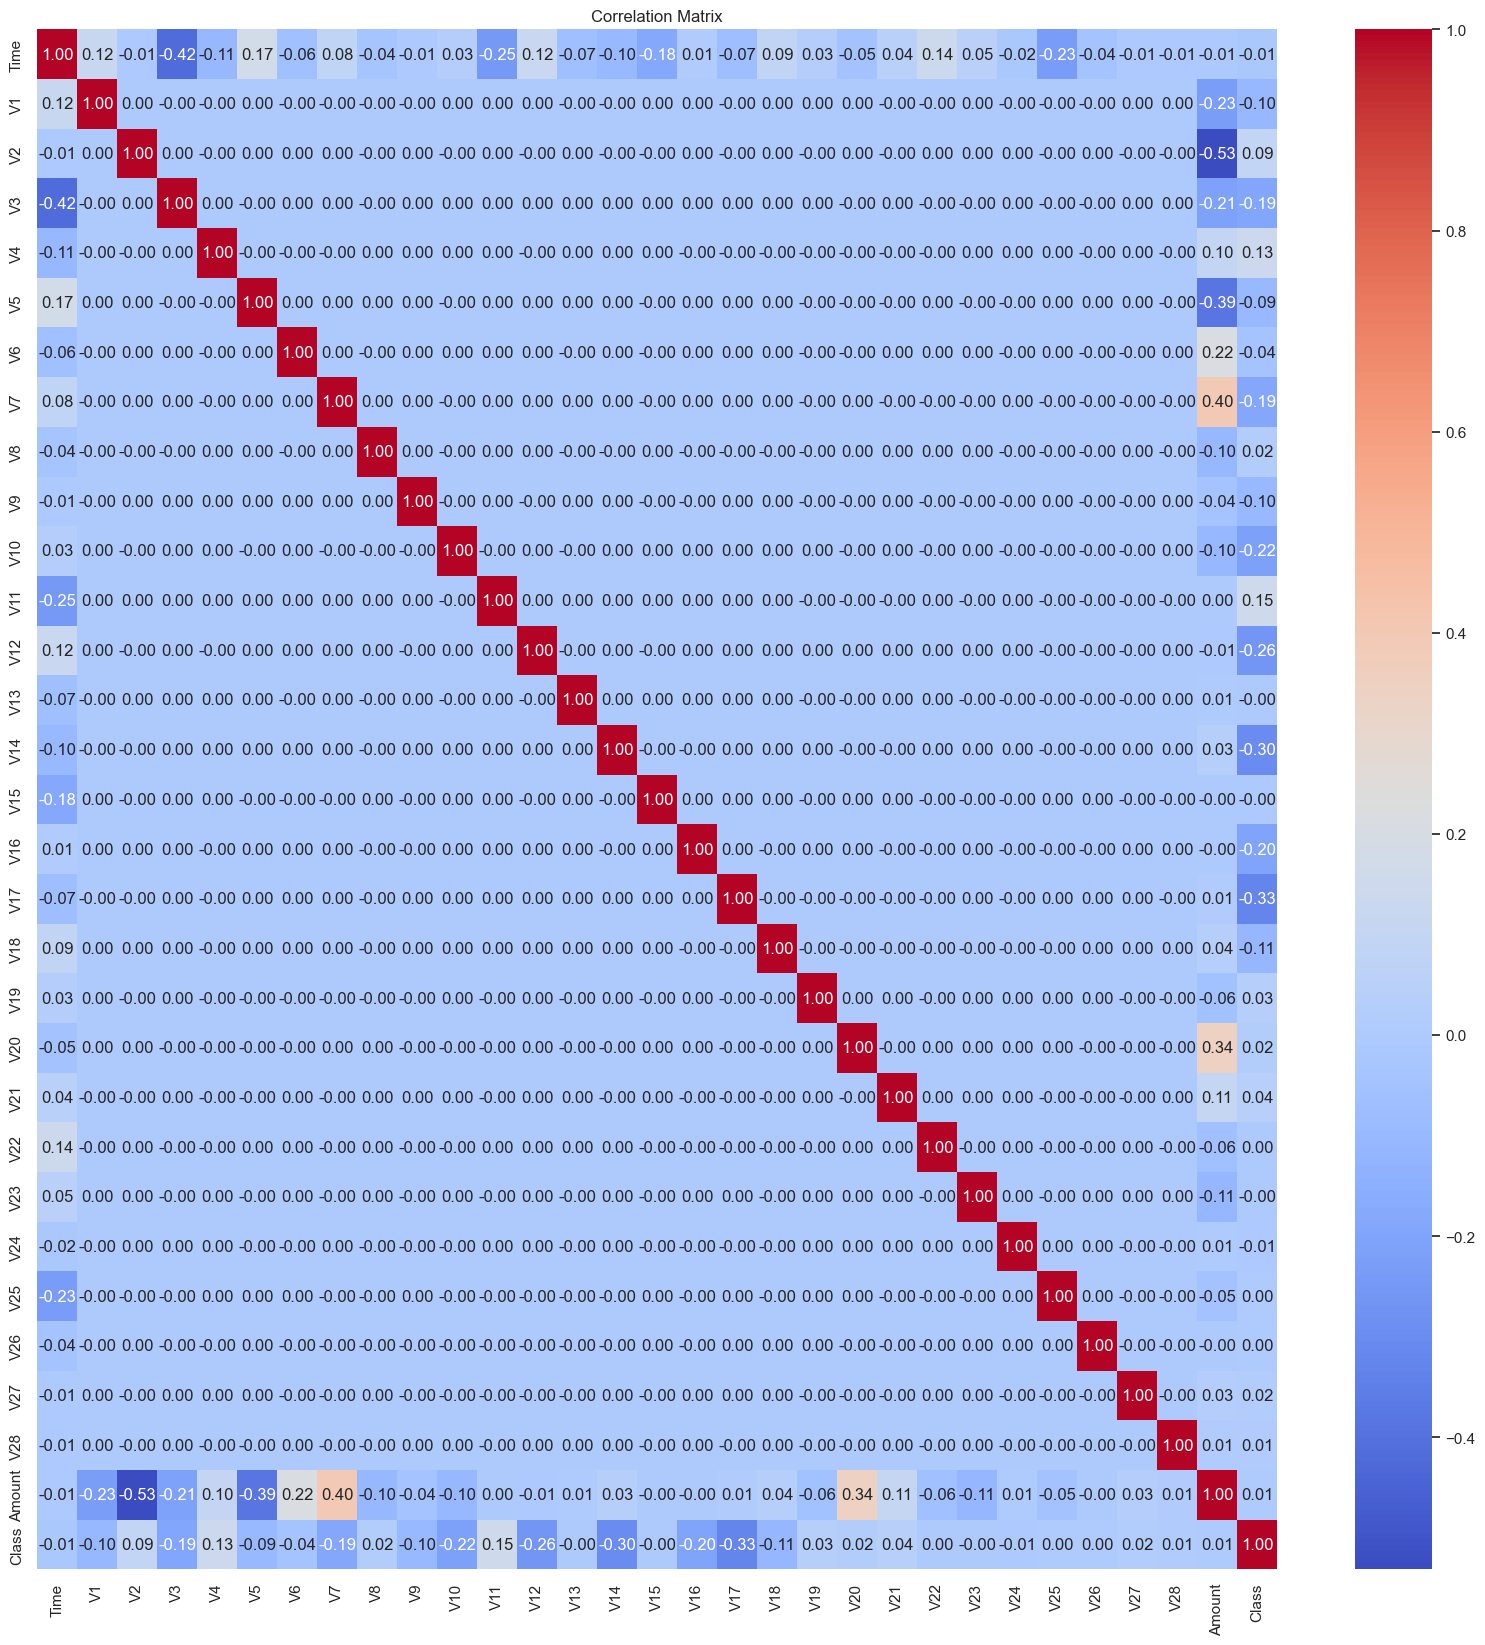

In [47]:
# Plot the distribution of the target variable 'Class'
sns.displot(df['Class'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Plot the distribution of transaction time
sns.displot(df['Time'])
plt.title('Distribution of Transaction Time')
plt.show()

# Plot the distribution of transaction amount
sns.displot(df['Amount'])
plt.title('Distribution of Transaction Amount')
plt.show()

# Plot the distribution of all the features
df_temp = df.drop(columns=['Time','Amount','Class'], axis=1)
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_temp.columns):
    sns.histplot(df_temp[col], ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Display correlation matrix
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [48]:
# Separate features and target variable
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)


In [50]:
# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))


In [51]:
# Logistic Regression
print("Logistic Regression:")
evaluate_model(LogisticRegression(), X_train, X_test, y_train, y_test)

# Random Forest Classifier
print("Random Forest Classifier:")
evaluate_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

# XGBoost Classifier
print("XGBoost Classifier:")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train, X_test, y_train, y_test)

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.62      0.71       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.85     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.7102803738317757
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.76      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8468468468468469
XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
 

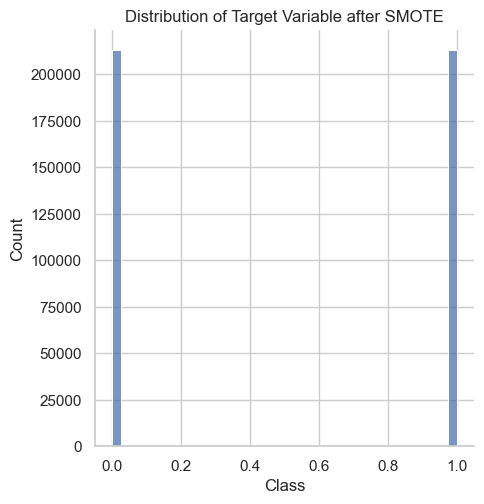

In [52]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot distribution of target variable after SMOTE
sns.displot(y_train_smote)
plt.title('Distribution of Target Variable after SMOTE')
plt.show()


In [53]:
# Re-evaluate models after applying SMOTE

# Logistic Regression with SMOTE
print("Logistic Regression with SMOTE:")
evaluate_model(LogisticRegression(), X_train_smote, X_test, y_train_smote, y_test)

# Random Forest Classifier with SMote
print("Random Forest Classifier with SMOTE:")
evaluate_model(RandomForestClassifier(), X_train_smote, X_test, y_train_smote, y_test)

# XGBoost Classifier with SMOTE
print("XGBoost Classifier with SMOTE:")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train_smote, X_test, y_train_smote, y_test)


Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 Score:  0.11082867310625318
Random Forest Classifier with SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.80      0.83       123

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8319327731092437
XGBoost Classifier with SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.85      0.78       123

    accuracy         